Number of TIMPS files for Aug 2022:  6277
['/uufs/chpc.utah.edu/common/home/u1147793/public_html/cpex_cv/TIMPS/2022/09/TIMPS_0244248_202209110530_09_-31.nc']
1
matching_file
/uufs/chpc.utah.edu/common/home/u1147793/public_html/cpex_cv/TIMPS/2022/09/TIMPS_0244248_202209110530_09_-31.nc
lifetime:34.0
[ 0.  8. 16. 24. 32. 40. 48. 56. 64.]


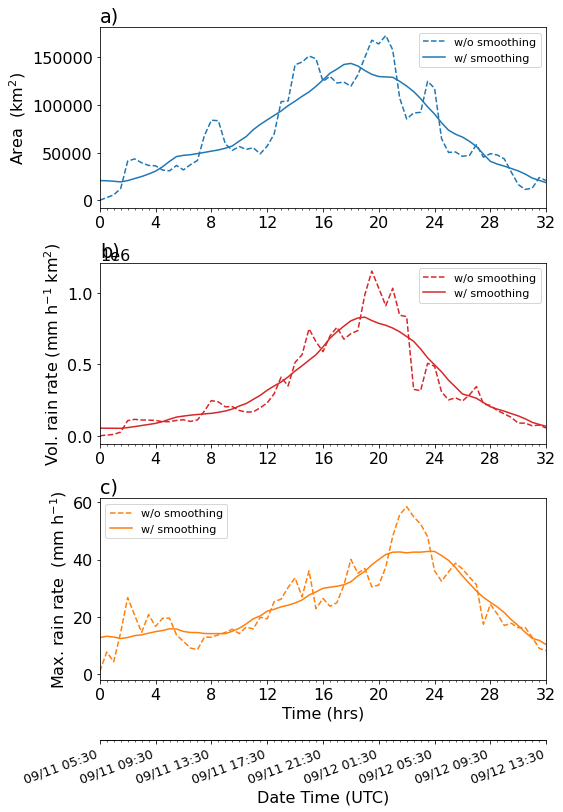

In [8]:
#Mani Rajagopal 
#Mar 15th 2023

#This program demonstrates how to to accesss the TIMPS data files
import numpy             as np
import netCDF4           as nc
import matplotlib.pyplot as plt 
import glob              as glob
import matplotlib.ticker as ticker
import matplotlib.dates  as mdates
import scipy.ndimage     as ndimage
import datetime          as dtmod
from datetime import datetime as dtclass
import sys               as sys

timps_dir                = "/uufs/chpc.utah.edu/common/home/u1147793/public_html/cpex_cv/TIMPS/2022/09/"

files                    = np.array(glob.glob(timps_dir + "*"))
n_files                  = np.size(files);


print("Number of TIMPS files for Aug 2022:  " + str(n_files))
# print("TIMPS files for Sep 2022          :  " );
# print(files);

mcs_id        = "244248"
matching_file = [fname for fname in files if  mcs_id in fname ]
print(matching_file)
print(len(matching_file))
if len(matching_file) == 0:
	print("MCS id not found- possible reasons are 1) incorrect id, 2) MCS initated outside domain or before 1st Sep 2022")
	sys.exit();
	
matching_file = matching_file[0]
print("matching_file")
print(matching_file)

#read the first file
ifile                    = matching_file; 
try:
	ds                       = nc.Dataset(ifile,"r");
	#read area
	area                     = np.array(ds.variables["area"]);
# 	print("area:")
# 	print(area)

	#Compute lifetime
	n_tsteps = np.size(area)
	lifetime = n_tsteps/2;
	print("lifetime:" + str(lifetime))
	
	#read volumetric rain rate
	vrr                      = np.array(ds.variables["vrr"]);
# 	print("Volumetric rain rate:")
# 	print(vrr)
	
	#read maximum rain rate
	maxrr                    = np.array(ds.variables["maxrr"]);
# 	print("Maximum rain rate:")
# 	print(maxrr)
	
	#datetime       
	datetime                = np.array(ds.variables["datetime"]);   
finally:
	ds.close()

#=============================== plotting 
n_rows                          = 3;
n_cols                          = 1;
font_size                       = 16
fig,axes                        = plt.subplots(nrows=3,ncols=1);
fig.patch.set_facecolor("w")
fig.set_size_inches(8*n_cols,4*n_rows);
plt.rcParams["font.family"]      = 'Arial'
plt.rcParams["font.size"]        = font_size;
plt.rcParams["font.weight"]      = "normal"
plt.rcParams["text.usetex"]      = False
colors                           = ["tab:blue","tab:red", "tab:orange"]

swidth                           = round(20/100. * len(time))
time                             = np.arange(0,lifetime,0.5)
xticks_loc1                      = np.arange(0,np.ceil(time[-1])+0.1,4);
ax                               = axes[0]

ax.plot(time,area,color=colors[0],ls="--", label="w/o smoothing");
ax.plot(time,ndimage.uniform_filter1d(area,swidth),color=colors[0],ls="-", label="w/ smoothing");
ax.legend(fontsize="x-small")
ax.set_xlim([xticks_loc1[0],xticks_loc1[-1]]);
ax.set_xticks(xticks_loc1)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.set_ylabel("Area  (km$^2$)",fontdict={"fontsize": 16})
# ax.yaxis.set_major_formatter(logfmt)
ax.set_title("a)",loc="left")


ax                               = axes[1]
ax.plot(time,vrr,color=colors[1],ls="--", label="w/o smoothing");
ax.plot(time,ndimage.uniform_filter1d(vrr,swidth),color=colors[1],ls="-", label="w/ smoothing");
ax.set_xlim([xticks_loc1[0],xticks_loc1[-1]]);
ax.set_xticks(xticks_loc1)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.set_ylabel("Vol. rain rate (mm h$^{-1}$ km$^2$)",fontdict={"fontsize": 16})
ax.legend(fontsize="x-small");
# ax.yaxis.set_major_formatter(logfmt)
ax.set_title("b)",loc="left")

ax                               = axes[2]
ax.plot(time,maxrr,color=colors[2],ls="--", label="w/o smoothing");
ax.plot(time,ndimage.uniform_filter1d(maxrr,swidth),color=colors[2],ls="-", label="w/ smoothing");
ax.set_xlabel("Time (hrs)");
ax.set_xlim([xticks_loc1[0],xticks_loc1[-1]]);
ax.set_xticks(xticks_loc1)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5));
ax.set_title("c)",loc="left")
#================ produce date/time
pos1 = ax.get_position()
ax2 = fig.add_axes((pos1.x0,pos1.y0-0.07,pos1.x1-pos1.x0,0.0));
ax2.yaxis.set_visible(False) # hide the yaxis
# xticks_loc2        = ax.get_xticks();
# print(xticks_loc2);
# print(xticks_loc1);
datetime             = np.array([ str(d) for d in datetime]);
datetime             = np.array([ dtclass.strptime(d,"%Y%m%d%H%M") for d in datetime]);
datetime_lbl         = np.array([ dtclass.strftime(d,"%m/%d %H:%M") for d in datetime]);
idx                  = np.arange(0,len(datetime)-0.9,4*2)
print(idx)
idx                  = idx.astype(np.uint16);
if len(idx) < len(xticks_loc1):
	datetime_lbl         = np.concatenate((datetime_lbl[idx],[""]))
else:
	datetime_lbl         = datetime_lbl[idx]
 
# dfmt                 = mdates.DateFormatter('%Y-%b');
ax2.set_xticks(xticks_loc1);
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5));
ax2.set_xticklabels(datetime_lbl);
for label in ax2.get_xticklabels(which='major'):
    label.set(rotation=20, horizontalalignment='right',fontsize=0.8*font_size)
ax2.set_xlabel("Date Time (UTC)",fontdict={"fontsize":font_size});
ax.set_ylabel("Max. rain rate  (mm h$^{-1}$)",fontdict={"fontsize": font_size});
ax.legend(fontsize="x-small");

plt.subplots_adjust(hspace=0.3);